# 05_03: Filling Missing Values

In [4]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [5]:
import getweather

In [6]:
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [7]:
np.mean(pasadena['TMIN']), np.min(pasadena['TMIN']), np.max(pasadena['TMIN'])

(nan, nan, nan)

In [8]:
pasadena['TMIN']

array([ 9.4,  8.3,  8.9,  8.3, 10. , 10.6,  7.2,  7.2,  7.8,  6.1,  5.6,
        6.1,  5. ,  3.9,  4.4,  2.8,  5. ,  3.9,  5.6,  7.2,  7.2,  8.9,
        5.6,  6.7,  3.3,  5.6,  3.3,  3.3,  3.3,  3.9,  5. ,  5. ,  6.1,
        nan,  7.2, 13.9, 11.1,  5.6,  2.2,  3.9,  6.1,  3.3,  5.6,  6.1,
        2.8,  2.8,  4.4,  7.8, 10. ,  9.4,  5.6,  5.6,  7.8,  5. ,  3.9,
        6.7,  7.2,  7.8,  6.7,  5. ,  5.6,  8.3,  9.4, 10. ,  9.4, 10. ,
        8.9, 10.6,  6.1,  8.9,  8.3,  7.2,  7.8, 10. , 10. ,  7.8, 10.6,
       13.3, 14.4, 10.6, 11.7, 11.1,  9.4, 10. , 12.2, 10. , 11.1, 12.8,
       12.8, 12.8, 12.2, 11.1, 10.6,  8.3,  8.3,  6.1,  7.2,  3.3, 16.1,
        3.9,  8.9,  7.8,  6.7,  7.2,  7.2,  9.4,  9.4, 12.2, 11.1,  8.9,
        6.1,  7.2, 10. , 10. , 16.1, 12.2, 12.8, 11.7,  nan, 11.1, 11.7,
       12.2, 11.1, 10.6, 11.1, 12.2, 13.3, 15.6, 16.1, 14.4, 13.3, 13.9,
       13.3, 10.6, 13.3, 13.9, 14.4, 15. ,  nan, 11.1, 14.4, 15. , 15.6,
       15. , 15.6, 16.7, 14.4, 14.4, 12.8, 13.9, 15

In [9]:
np.nan + 1

nan

In [10]:
np.isnan(pasadena['TMIN'])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [11]:
False + True + True

2

In [12]:
np.sum(np.isnan(pasadena['TMIN']))

15

In [13]:
np.nanmin(pasadena['TMIN']), np.nanmax(pasadena['TMAX']) #ці функції ігнорують НАЛ значення

(2.2, 41.1)

In [14]:
pasadena['TMIN'][np.isnan(pasadena['TMIN'])] = np.nanmean(pasadena['TMIN'])
pasadena['TMAX'][np.isnan(pasadena['TMAX'])] = np.nanmean(pasadena['TMAX'])

In [15]:
pasadena['TMIN']

array([ 9.4       ,  8.3       ,  8.9       ,  8.3       , 10.        ,
       10.6       ,  7.2       ,  7.2       ,  7.8       ,  6.1       ,
        5.6       ,  6.1       ,  5.        ,  3.9       ,  4.4       ,
        2.8       ,  5.        ,  3.9       ,  5.6       ,  7.2       ,
        7.2       ,  8.9       ,  5.6       ,  6.7       ,  3.3       ,
        5.6       ,  3.3       ,  3.3       ,  3.3       ,  3.9       ,
        5.        ,  5.        ,  6.1       , 11.45314286,  7.2       ,
       13.9       , 11.1       ,  5.6       ,  2.2       ,  3.9       ,
        6.1       ,  3.3       ,  5.6       ,  6.1       ,  2.8       ,
        2.8       ,  4.4       ,  7.8       , 10.        ,  9.4       ,
        5.6       ,  5.6       ,  7.8       ,  5.        ,  3.9       ,
        6.7       ,  7.2       ,  7.8       ,  6.7       ,  5.        ,
        5.6       ,  8.3       ,  9.4       , 10.        ,  9.4       ,
       10.        ,  8.9       , 10.6       ,  6.1       ,  8.9 

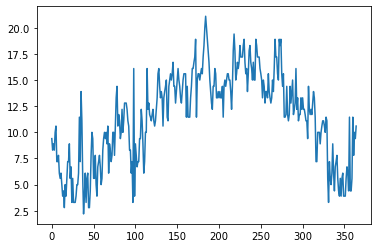

In [16]:
pp.plot(pasadena['TMIN'])

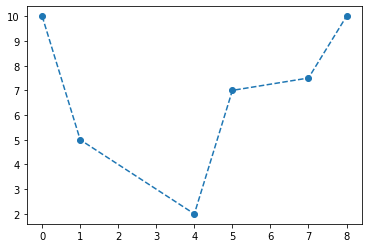

In [17]:
xdata = np.array([0,1,4,5,7,8], 'd')     #інтерполяція використ для визначення правдоподібного числа для значень, які відсутні використувуючи значення поряд
ydata = np.array([10,5,2,7,7.5,10], 'd')

pp.plot(xdata, ydata, '--o')

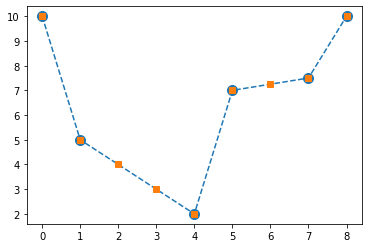

In [19]:
# interpolate x/y data with missing values to continuous x values
# інтерполювати дані x/y з відсутніми значеннями до безперервних значень x

xnew = np.linspace(0, 8, 9)
ynew = np.interp(xnew, xdata, ydata)

pp.plot(xdata, ydata, '--o', ms=10)
pp.plot(xnew, ynew, 's')

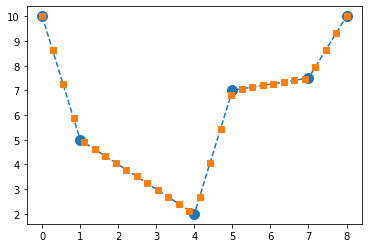

In [18]:
# interpolate x/y data with missing values to denser, continuous x values
# інтерполювати дані x/y з відсутніми значеннями до більш щільних безперервних значень x

xnew = np.linspace(0, 8, 30)
ynew = np.interp(xnew, xdata, ydata)

pp.plot(xdata, ydata, '--o', ms=10)
pp.plot(xnew, ynew, 's')

In [20]:
pasadena = getweather.getyear('PASADENA', ['TMIN', 'TMAX'], 2001)

In [21]:
# build a Boolean mask of "good" (non-NaN) TMIN values;
# interpolate "good" days/TMIN to full range of days 
# створити логічну маску "хороших" (не NaN) значень TMIN;
# інтерполювати "добрі" дні/TMIN до повного діапазону днів

good = ~np.isnan(pasadena['TMIN'])
x = np.arange(0, 365)

np.interp(x, x[good], pasadena['TMIN'][good])

array([ 9.4  ,  8.3  ,  8.9  ,  8.3  , 10.   , 10.6  ,  7.2  ,  7.2  ,
        7.8  ,  6.1  ,  5.6  ,  6.1  ,  5.   ,  3.9  ,  4.4  ,  2.8  ,
        5.   ,  3.9  ,  5.6  ,  7.2  ,  7.2  ,  8.9  ,  5.6  ,  6.7  ,
        3.3  ,  5.6  ,  3.3  ,  3.3  ,  3.3  ,  3.9  ,  5.   ,  5.   ,
        6.1  ,  6.65 ,  7.2  , 13.9  , 11.1  ,  5.6  ,  2.2  ,  3.9  ,
        6.1  ,  3.3  ,  5.6  ,  6.1  ,  2.8  ,  2.8  ,  4.4  ,  7.8  ,
       10.   ,  9.4  ,  5.6  ,  5.6  ,  7.8  ,  5.   ,  3.9  ,  6.7  ,
        7.2  ,  7.8  ,  6.7  ,  5.   ,  5.6  ,  8.3  ,  9.4  , 10.   ,
        9.4  , 10.   ,  8.9  , 10.6  ,  6.1  ,  8.9  ,  8.3  ,  7.2  ,
        7.8  , 10.   , 10.   ,  7.8  , 10.6  , 13.3  , 14.4  , 10.6  ,
       11.7  , 11.1  ,  9.4  , 10.   , 12.2  , 10.   , 11.1  , 12.8  ,
       12.8  , 12.8  , 12.2  , 11.1  , 10.6  ,  8.3  ,  8.3  ,  6.1  ,
        7.2  ,  3.3  , 16.1  ,  3.9  ,  8.9  ,  7.8  ,  6.7  ,  7.2  ,
        7.2  ,  9.4  ,  9.4  , 12.2  , 11.1  ,  8.9  ,  6.1  ,  7.2  ,
      

In [22]:
# fill NaNs in any array by interpolation
# заповнити NaN у будь-якому масиві шляхом інтерполяції

def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

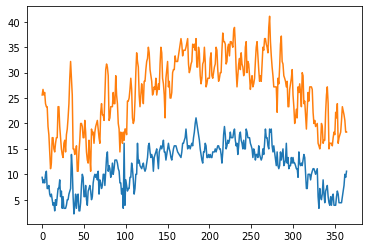

In [23]:
pp.plot(fillnans(pasadena['TMIN']))
pp.plot(fillnans(pasadena['TMAX']))